In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import boto3
from boto3 import client
from IPython.display import display
from io import BytesIO
import matplotlib.image as mpimg
from scipy.stats import pearsonr
import scipy.stats as stats

In [3]:
pd.set_option('display.max_columns', None)

In [9]:
df = pd.read_pickle('BookLabels_Histograms_RBG.pkl')

In [10]:
df.head()

,ISBN,Name,Confidence,Instances,Num_Instances,isbn_x,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series,Unnamed: 0,isbn_y,blue_0,green_0,red_0,blue_1,green_1,red_1,blue_2,green_2,red_2,blue_3,green_3,red_3,blue_4,green_4,red_4,blue_5,green_5,red_5,blue_6,green_6,red_6,blue_7,green_7,red_7,blue_8,green_8,red_8,blue_9,green_9,red_9,blue_10,green_10,red_10,blue_11,green_11,red_11,blue_12,green_12,red_12,blue_13,green_13,red_13,blue_14,green_14,red_14,blue_15,green_15,red_15,blue_16,green_16,red_16,blue_17,green_17,red_17,blue_18,green_18,red_18,blue_19,green_19,red_19,blue_20,green_20,red_20,blue_21,green_21,red_21,blue_22,green_22,red_22,blue_23,green_23,red_23,blue_24,green_24,red_24,blue_25,green_25,red_25,blue_26,green_26,red_26,blue_27,green_27,red_27,blue_28,green_28,red_28,blue_29,green_29,red_29,blue_30,green_30,red_30,blue_31,green_31,red_31,isbn,blue,green,red
0,0001642081,Text,99.816299,[],0,0001642081,4,[265777],US,,"[{'count': '12', 'name': 'to-read'}, {'count':...",,false,4.09,,[],,Hardcover,https://www.goodreads.com/book/show/2657015-ba...,"[{'author_id': '14254497', 'role': ''}]",Collins,160,,9780001642089,,,1970,https://www.goodreads.com/book/show/2657015-ba...,https://images.gr-assets.com/books/1307384593m...,2657015,32,2681793,"Ballet for Laura (Laura, #1)","Ballet for Laura (Laura, #1)",1224,0001642081,13.0,13.0,13.0,12.0,12.0,12.0,11.0,11.0,11.0,14.0,14.0,14.0,24.0,24.0,24.0,30.0,30.0,30.0,20.0,20.0,20.0,30.0,30.0,30.0,17.0,17.0,17.0,38.0,38.0,38.0,47.0,47.0,47.0,37.0,37.0,37.0,64.0,64.0,64.0,67.0,67.0,67.0,69.0,69.0,69.0,75.0,75.0,75.0,66.0,66.0,66.0,60.0,60.0,60.0,87.0,87.0,87.0,90.0,90.0,90.0,113.0,113.0,113.0,108.0,108.0,108.0,155.0,155.0,155.0,135.0,135.0,135.0,137.0,137.0,137.0,150.0,150.0,150.0,156.0,156.0,156.0,150.0,150.0,150.0,151.0,151.0,151.0,176.0,176.0,176.0,563.0,563.0,563.0,20175.0,20175.0,20175.0,0001642081,245.482292,245.482292,245.482292
1,0001642081,Menu,88.789520,"[{'BoundingBox': {'Width': 0.9102855324745178,...",1,0001642081,4,[265777],US,,"[{'count': '12', 'name': 'to-read'}, {'count':...",,false,4.09,,[],,Hardcover,https://www.goodreads.com/book/show/2657015-ba...,"[{'author_id': '14254497', 'role': ''}]",Collins,160,,9780001642089,,,1970,https://www.goodreads.com/book/show/2657015-ba...,https://images.gr-assets.com/books/1307384593m...,2657015,32,2681793,"Ballet for Laura (Laura, #1)","Ballet for Laura (Laura, #1)",1224,0001642081,13.0,13.0,13.0,12.0,12.0,12.0,11.0,11.0,11.0,14.0,14.0,14.0,24.0,24.0,24.0,30.0,30.0,30.0,20.0,20.0,20.0,30.0,30.0,30.0,17.0,17.0,17.0,38.0,38.0,38.0,47.0,47.0,47.0,37.0,37.0,37.0,64.0,64.0,64.0,67.0,67.0,67.0,69.0,69.0,69.0,75.0,75.0,75.0,66.0,66.0,66.0,60.0,60.0,60.0,87.0,87.0,87.0,90.0,90.0,90.0,113.0,113.0,113.0,108.0,108.0,108.0,155.0,155.0,155.0,135.0,135.0,135.0,137.0,137.0,137.0,150.0,150.0,150.0,156.0,156.0,156.0,150.0,150.0,150.0,151.0,151.0,151.0,176.0,176.0,176.0,563.0,563.0,563.0,20175.0,20175.0,20175.0,0001642081,245.482292,245.482292,245.482292
2,0001642081,Label,86.814842,[],0,0001642081,4,[265777],US,,"[{'count': '12', 'name': 'to-read'}, {'count':...",,false,4.09,,[],,Hardcover,https://www.goodreads.com/book/show/2657015-ba...,"[{'author_id': '14254497', 'role': ''}]",Collins,160,,9780001642089,,,1970,https://www.goodreads.com/book/show/2657015-ba...,https://images.gr-assets.com/books/1307384593m...,2657015,32,2681793,"Ballet for Laura (Laura, #1)","Ballet for Laura (Laura, #1)",1224,0001642081,13.0,13.0,13.0,12.0,12.0,12.0,11.0,11.0,11.0,14.0,14.0,14.0,24.0,24.0,24.0,30.0,30.0,30.0,20.0,20.0,20.0,30.0,30.0,30.0,17.0,17.0,17.0,38.0,38.0,38.0,47.0,47.0,47.0,37.0,37.0,37.0,64.0,64.0,64.0,67.0,67.0,67.0,69.0,69.0,69.0,75.0,75.0,75.0,66.0,66.0,66.0,60.0,60.0,60.0,87.0,87.0,8

In [11]:
df.shape

(66528, 136)

In [21]:
df.columns.values

array(['ISBN', 'Name', 'Confidence', 'Instances', 'Num_Instances',
       'text_reviews_count', 'series', 'country_code', 'language_code',
       'popular_shelves', 'asin', 'is_ebook', 'average_rating',
       'kindle_asin', 'similar_books', 'description', 'format', 'link',
       'authors', 'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year',
       'url', 'image_url', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series', 'Unnamed: 0', 'blue_0', 'green_0', 'red_0',
       'blue_1', 'green_1', 'red_1', 'blue_2', 'green_2', 'red_2',
       'blue_3', 'green_3', 'red_3', 'blue_4', 'green_4', 'red_4',
       'blue_5', 'green_5', 'red_5', 'blue_6', 'green_6', 'red_6',
       'blue_7', 'green_7', 'red_7', 'blue_8', 'green_8', 'red_8',
       'blue_9', 'green_9', 'red_9', 'blue_10', 'green_10', 'red_10',
       'blue_11', 'green_11', 'red_11', 'blue_12', 'green_12', 'red_12',
       'blue_13', 'g

In [13]:
df.country_code.value_counts()

US    66528
Name: country_code, dtype: int64

In [14]:
df.language_code.value_counts()

         43694
eng      15241
en-US     4220
en-GB     1198
spa        419
ita        376
ger        306
fre        250
nl         196
ind        164
por         81
swe         44
per         42
dan         37
mul         33
tur         28
fin         26
gre         26
ben         18
scr         18
pol         15
rum         13
hun         10
en-CA       10
cze         10
zho         10
kor          9
rus          8
fil          7
nor          6
ara          5
nob          5
jpn          3
Name: language_code, dtype: int64

In [15]:
df['Confidence'].describe()

count    66528.000000
mean        77.125075
std         14.471641
min         55.000832
25%         63.476662
50%         76.743393
75%         90.676348
max        100.000000
Name: Confidence, dtype: float64

In [16]:
# Drop duplicate columns of isbn

df.drop(columns=['isbn_x', 'isbn_y', 'isbn'], inplace=True)

In [28]:
df[['red','blue','green']].describe()

,red,blue,green
count,66528.000000,66528.000000,66528.000000
mean,165.026054,142.047527,157.737589
std,49.548351,52.046555,47.627493
min,4.897329,3.264738,3.253530
25%,130.674228,104.899187,124.263384
50%,170.055839,140.353887,159.732537
75%,202.748557,177.597147,191.351275
max,255.000000,255.000000,255.000000


In [161]:
df.columns.values

array(['ISBN', 'Name', 'Confidence', 'Instances', 'Num_Instances',
       'text_reviews_count', 'series', 'country_code', 'language_code',
       'popular_shelves', 'asin', 'is_ebook', 'average_rating',
       'kindle_asin', 'similar_books', 'description', 'format', 'link',
       'authors', 'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year',
       'url', 'image_url', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series', 'Unnamed: 0', 'blue_0', 'green_0', 'red_0',
       'blue_1', 'green_1', 'red_1', 'blue_2', 'green_2', 'red_2',
       'blue_3', 'green_3', 'red_3', 'blue_4', 'green_4', 'red_4',
       'blue_5', 'green_5', 'red_5', 'blue_6', 'green_6', 'red_6',
       'blue_7', 'green_7', 'red_7', 'blue_8', 'green_8', 'red_8',
       'blue_9', 'green_9', 'red_9', 'blue_10', 'green_10', 'red_10',
       'blue_11', 'green_11', 'red_11', 'blue_12', 'green_12', 'red_12',
       'blue_13', 'g

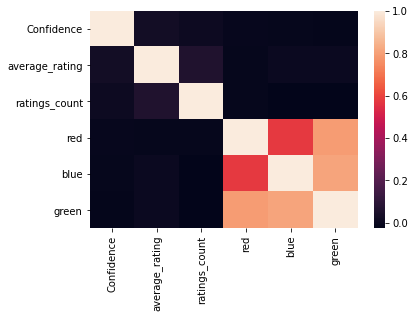

In [163]:
corrmatrix = df[['Confidence', 'average_rating', 'num_pages', 'publication_year', 'ratings_count', 'red', 'blue', 'green']].corr()
sns.heatmap(corrmatrix)

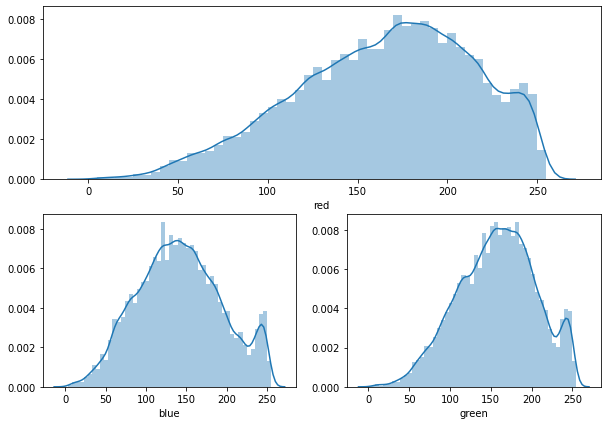

In [43]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
sns.distplot(df['red'])
plt.subplot(2,2,3)
sns.distplot(df['blue'])
plt.subplot(2,2,4)
sns.distplot(df['green'])
plt.show()

In [44]:
# Create dataframe where confidence levels of labels are above 70

Conf_70 = df[(df['Confidence'] > 70)]

In [48]:
# Group average rating by ISBN

isbn_rating = Conf_70.groupby('ISBN').average_rating.mean().reset_index()

In [49]:
isbn_rating.head()

,ISBN,average_rating
0,0001642081,4.09
1,000171287X,4.18
2,000171323X,4.11
3,0001713361,4.24
4,0001953184,4.25


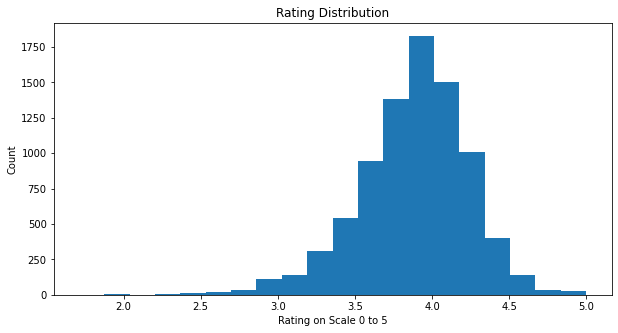

In [47]:
plt.figure(figsize=(10,5))
plt.hist(isbn_rating.average_rating, bins=20)
plt.title('Rating Distribution')
plt.xlabel('Rating on Scale 0 to 5')
plt.ylabel('Count')
plt.show()

*average ratings shows a Normal Distribution. CLT*

In [54]:
# Create describe dataframe of grouping average rating by Name of label

Name_rating = Conf_70.groupby('Name').average_rating.describe()

In [55]:
Name_rating

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
Aardvark,3.0,4.050000,0.205183,3.84,3.9500,4.06,4.1550,4.25
Absinthe,4.0,4.110000,0.280595,3.71,4.0175,4.21,4.3025,4.31
Abyssinian,5.0,3.996000,0.123814,3.84,3.9300,3.98,4.0700,4.16
Accessories,19.0,3.938421,0.309574,3.31,3.7400,3.92,4.0900,4.45
Accessory,8.0,3.872500,0.319184,3.31,3.7700,3.85,3.9775,4.40
...,...,...,...,...,...,...,...,...
Worship,6.0,4.093333,0.293644,3.60,3.9875,4.13,4.2875,4.42
Wrist,1.0,3.820000,NaN,3.82,3.8200,3.82,3.8200,3.82
Yard,4.0,3.952500,0.194487,3.76,3.8050,3.94,4.0875,4.17


In [57]:
# Create column for difference of median and mean

Name_rating['median-mean'] = abs(Name_rating['50%'] - Name_rating['mean'])

In [62]:
# Sort by greatest median-mean value.

Name_rating.sort_values(by='median-mean',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max,median-mean
Name,,,,,,,,,
Eagle,5.0,3.244000,0.835392,1.88,3.000,3.700,3.8200,3.82,0.456000
Medication,3.0,3.560000,1.154686,2.25,3.125,4.000,4.2150,4.43,0.440000
Pill,3.0,3.560000,1.154686,2.25,3.125,4.000,4.2150,4.43,0.440000
Beak,7.0,3.727143,0.855136,1.88,3.675,4.120,4.2350,4.27,0.392857
Dodo,4.0,3.367500,1.014672,1.88,3.155,3.745,3.9575,4.10,0.377500
Reef,3.0,3.773333,0.609289,3.07,3.590,4.110,4.1250,4.14,0.336667
Train Track,3.0,4.296667,0.609617,3.92,3.945,3.970,4.4850,5.00,0.326667
Rail,3.0,4.296667,0.609617,3.92,3.945,3.970,4.4850,5.00,0.326667
Railway,3.0,4.296667,0.609617,3.92,3.945,3.970,4.4850,5.00,0.326667


*Observe the greatest median-mean values have low count.*

In [67]:
# Filter Name_rating to labels that have greater than 10 counts.
# Sort by greatest median-mean value.

Name_rating[Name_rating['count'] > 10].sort_values(by='median-mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max,median-mean
Name,,,,,,,,,
Green,11.0,3.898182,0.412839,3.13,3.6250,4.060,4.1750,4.50,0.161818
Rodent,31.0,3.961290,0.449672,2.88,3.7250,4.100,4.1700,5.00,0.138710
Confectionery,27.0,3.832222,0.521502,2.25,3.4750,3.960,4.1150,5.00,0.127778
Grass,29.0,3.926552,0.302493,3.00,3.7300,4.050,4.1600,4.39,0.123448
Greeting Card,105.0,3.878952,0.435060,2.60,3.6700,4.000,4.1600,5.00,0.121048
...,...,...,...,...,...,...,...,...,...
Legend of Zelda,11.0,3.908182,0.412403,3.27,3.7050,3.910,4.2250,4.46,0.001818
Coat,28.0,3.838571,0.281184,3.37,3.6425,3.840,3.9550,4.70,0.001429
Symbol,120.0,3.908667,0.331860,3.11,3.6900,3.910,4.1325,4.57,0.001333


*Observe the median-mean value is significantly less for labels that have greater than 10 count.*

In [65]:
Name_rating[Name_rating['count'] > 10].sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max,median-mean
Name,,,,,,,,,
Planet,18.0,4.172778,0.458576,3.40,3.7750,4.085,4.6000,4.83,0.087778
Jar,15.0,4.170667,0.300534,3.38,4.1350,4.250,4.3250,4.51,0.079333
Vase,12.0,4.127500,0.316777,3.38,4.1200,4.230,4.2700,4.45,0.102500
White,12.0,4.121667,0.210921,3.84,3.9950,4.075,4.2450,4.60,0.046667
Pottery,15.0,4.114000,0.236365,3.61,4.0150,4.150,4.2500,4.41,0.036000
...,...,...,...,...,...,...,...,...,...
Dvd,19.0,3.740526,0.420046,3.00,3.5550,3.690,3.9900,4.50,0.050526
Disk,26.0,3.734231,0.408110,3.00,3.5225,3.700,3.9275,4.50,0.034231
Plush,16.0,3.731875,0.364659,3.00,3.5625,3.820,4.0000,4.19,0.088125


In [63]:
Name_rating[Name_rating['count'] > 10].sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max,median-mean
Name,,,,,,,,,
Jar,15.0,4.170667,0.300534,3.38,4.1350,4.250,4.3250,4.51,0.079333
Vase,12.0,4.127500,0.316777,3.38,4.1200,4.230,4.2700,4.45,0.102500
Pottery,15.0,4.114000,0.236365,3.61,4.0150,4.150,4.2500,4.41,0.036000
Sticker,14.0,4.073571,0.323956,3.55,3.8200,4.125,4.2900,4.56,0.051429
Bear,17.0,4.048235,0.243804,3.65,3.8600,4.110,4.1500,4.53,0.061765
...,...,...,...,...,...,...,...,...,...
Diaper,26.0,3.716538,0.349387,2.92,3.5975,3.700,3.9150,4.42,0.016538
Disk,26.0,3.734231,0.408110,3.00,3.5225,3.700,3.9275,4.50,0.034231
Vegetable,15.0,3.743333,0.448261,2.90,3.5000,3.690,4.1050,4.36,0.053333


Do books with more labels correlate with higher ratings?

In [68]:
Name_rating.sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max,median-mean
Name,,,,,,,,,
Person,3909.0,3.887892,0.349196,2.00,3.69,3.920,4.12,5.00,0.032108
Advertisement,3181.0,3.875086,0.356125,1.83,3.67,3.900,4.12,5.00,0.024914
Poster,3098.0,3.876833,0.355202,1.83,3.68,3.905,4.12,5.00,0.028167
Human,2765.0,3.889392,0.345570,2.00,3.69,3.920,4.12,5.00,0.030608
Paper,2543.0,3.885155,0.349219,1.83,3.68,3.910,4.12,5.00,0.024845
...,...,...,...,...,...,...,...,...,...
Newborn,1.0,4.080000,NaN,4.08,4.08,4.080,4.08,4.08,0.000000
Capsule,1.0,4.000000,NaN,4.00,4.00,4.000,4.00,4.00,0.000000
Navy,1.0,4.080000,NaN,4.08,4.08,4.080,4.08,4.08,0.000000


In [103]:
rating_numlabels = df.groupby(['ISBN', 'average_rating'])[['Name']].count().reset_index()

In [106]:
rating_numlabels

,ISBN,average_rating,Name
0,0001642081,4.09,9
1,000171287X,4.18,9
2,000171323X,4.11,8
3,0001713361,4.24,10
4,0001953184,4.25,5
...,...,...,...
8760,9992195258,3.56,7
8761,999749024X,2.56,8
8762,999922749X,3.80,9
8763,BK35479525,3.25,2


In [104]:
rating_numlabels.describe()

,average_rating,Name
count,8765.000000,8765.000000
mean,3.879479,7.590188
std,0.358057,2.459344
min,1.710000,1.000000
25%,3.680000,6.000000
50%,3.910000,8.000000
75%,4.120000,10.000000
max,5.000000,10.000000


**Correlation with scipy pearsonr. (Correlation, P-value)**

In [105]:
pearsonr(rating_numlabels['average_rating'], rating_numlabels['Name'])

(0.003588899529455455, 0.736907364279449)

**Do red dominant book covers have higher ratings?**

In [170]:
red_dom = df[(df['red'] > df['blue']) & (df['red'] > df['blue'])].groupby('ISBN').average_rating.mean().reset_index()
red_dom[red_dom['average_rating'] >= 3.9]

,ISBN,average_rating
0,000171287X,4.18
1,000171323X,4.11
2,0001713361,4.24
4,0006392784,4.18
5,000647926X,3.98
...,...,...
6130,9796055899,4.06
6132,9796865017,4.03
6133,9796868873,4.11
6135,9888341200,4.36


In [ ]:
red_dom

In [171]:
blue_dom = df[(df['blue'] > df['red']) & (df['blue'] > df['green'])].groupby('ISBN').average_rating.mean().reset_index()
blue_dom[blue_dom['average_rating'] >= 3.9]

,ISBN,average_rating
0,0001953184,4.25
3,0006608361,4.30
4,0006640613,4.23
5,000670428X,4.21
8,0006914888,4.15
...,...,...
1643,9792200339,3.93
1646,9796057069,3.93
1647,9870403441,4.29
1648,9876096605,4.23


In [172]:
green_dom = df[(df['green'] > df['blue']) & (df['green'] > df['red'])].groupby('ISBN').average_rating.mean().reset_index()
green_dom[green_dom['average_rating'] > 3.9]

,ISBN,average_rating
1,0006704328,4.20
2,0006709931,4.21
5,0007149697,4.28
7,0007173113,4.35
8,0007202423,4.06
...,...,...
1815,9719736757,4.14
1817,9780987286,4.13
1819,9792212094,3.94
1821,979686357X,4.26


**Do highly rated books correlate with high exposure?**

In [136]:
high_exposure_rating = df[(df['red'] > 200) | (df['blue'] > 200) | (df['green'] > 200)].groupby(['ISBN', 'average_rating'])[['red', 'blue', 'green']].mean().reset_index()
high_exposure_rating

,ISBN,average_rating,red,blue,green
0,0001642081,4.09,245.482292,245.482292,245.482292
1,000171287X,4.18,212.981161,159.713438,183.321027
2,000171323X,4.11,216.134864,134.810711,212.025052
3,0001713361,4.24,209.134277,90.721413,184.460360
4,0001953184,4.25,245.732569,245.896947,245.730491
...,...,...,...,...,...
2652,994803760,4.25,212.918121,191.037079,195.670532
2653,9966217991,3.00,243.709791,243.709791,243.709791
2654,9966219250,3.00,248.157633,248.306519,248.154541
2655,999922749X,3.80,235.634277,235.634277,235.634277


In [135]:
# Anova Test
fvalue, pvalue = stats.f_oneway(high_exposure_rating['red'], high_exposure_rating['blue'], high_exposure_rating['green'])
print(fvalue, pvalue)

427.53205777613584 4.245049118236002e-177


**Do under exposed book covers correlate with low ratings?**

In [137]:
low_exposure_rating = df[(df['red'] < 50) | (df['blue'] < 50) | (df['green'] < 50)].groupby(['ISBN', 'average_rating'])[['red', 'blue', 'green']].mean().reset_index()
low_exposure_rating

,ISBN,average_rating,red,blue,green
0,0006392784,4.18,85.305852,40.127178,53.461877
1,000672583X,3.87,48.592407,183.363241,114.408732
2,000714377X,3.73,40.776579,144.087347,60.179083
3,0007173105,3.99,218.401071,36.191977,129.138825
4,0007173113,4.35,157.408016,34.802481,179.488171
...,...,...,...,...,...
387,9722109421,3.67,29.079307,112.840541,95.661740
388,9758467174,3.86,7.360406,11.433693,11.223112
389,9793659939,4.01,153.079711,47.513365,76.984296
390,9796868873,4.11,223.760703,43.540688,214.814352


**Does exposure correlate with the confidence of labels?**

In [149]:
df.groupby(['Name', 'red', 'blue', 'green'])['Confidence'].mean().reset_index().head(20)

,Name,red,blue,green,Confidence
0,Aardvark,141.106018,160.702393,159.314270,64.311554
1,Aardvark,147.360995,130.395055,148.916492,72.118721
2,Aardvark,155.798961,151.405762,155.843928,68.085644
3,Aardvark,169.868242,178.179874,206.740761,57.002758
4,Aardvark,172.086415,158.939408,171.123330,96.025345
5,Aardvark,176.511364,118.822301,127.567116,79.317467
6,Aardvark,189.861235,196.619916,200.274430,56.511696
7,Absinthe,46.122500,84.501830,55.225402,97.115822
8,Absinthe,72.842093,66.591935,84.026436,55.658310
9,Absinthe,79.050712,99.415819,91.844351,58.494320
